#Installing the required packages to load the data through API 

#pip install pandas 
#pip install sodapy


In [1]:
pip install sodapy 

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import necessary libraries
from sodapy import Socrata
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us", None)

# Record start time
start_time = time.time()

results = client.get("h9gi-nx95", limit=2048642)

# Convert to pandas DataFrame
motor_data = pd.DataFrame.from_records(results)

# Record end time
end_time = time.time()

# Calculate loading time
loading_time = end_time - start_time

# Print loading time
print(f"Dataset loaded in {loading_time:.2f} seconds")

Dataset loaded in 253.44 seconds


In [4]:
motor_data

,crash_date,crash_time,on_street_name,off_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,...,latitude,longitude,location,cross_street_name,contributing_factor_vehicle_3,vehicle_type_code_3,contributing_factor_vehicle_4,vehicle_type_code_4,contributing_factor_vehicle_5,vehicle_type_code_5
0,2021-09-11T00:00:00.000,2:39,WHITESTONE EXPRESSWAY,20 AVENUE,2,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-03-26T00:00:00.000,11:45,QUEENSBORO BRIDGE UPPER,NaN,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-06-29T00:00:00.000,6:55,THROGS NECK BRIDGE,NaN,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-09-11T00:00:00.000,9:35,NaN,NaN,0,0,0,0,0,0,...,40.667202,-73.8665,"{'latitude': '40.667202', 'longitude': '-73.86...",1211 LORING AVENUE,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-12-14T00:00:00.000,8:13,SARATOGA AVENUE,DECATUR STREET,0,0,0,0,0,0,...,40.683304,-73.917274,"{'latitude': '40.683304', 'longitude': '-73.91...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2048637,2023-07-18T00:00:00.000,14:25,ELIOT AVENUE,69 PLACE,2,0,0,0,0,0,...,40.720154,-73.88967,"{'latitude': '40.720154', 'longitude': '-73.88...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2048638,2023-07-04T00:00:00.000,12:00,3 AVENUE,EAST 144 STREET,1,0,0,0,0,0,...,40.81373,-73.9221,"{'latitude': '40.81373', 'longitude': '-73.922...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2048639,2023-07-16T00:00:00.000,0:35,NaN,NaN,0,0,0,0,0,0,...,40.741436,-73.98124,"{'latitude': '40.741436', 'longitude': '-73.98...",375 3 AVENUE,NaN,NaN,NaN,NaN,NaN,NaN
2048640,2023-07-09T00:00:00.000,9:46,PARKSIDE AVENUE,PARADE PLACE,1,0,0,0,1,0,...,40.65319,-73.96622,"{'latitude': '40.65319', 'longitude': '-73.966...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Exploratory Data Analysis (EDA)

In [5]:
# Display basic information about the dataset
print(motor_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2048642 entries, 0 to 2048641
Data columns (total 29 columns):
 #   Column                         Dtype 
---  ------                         ----- 
 0   crash_date                     object
 1   crash_time                     object
 2   on_street_name                 object
 3   off_street_name                object
 4   number_of_persons_injured      object
 5   number_of_persons_killed       object
 6   number_of_pedestrians_injured  object
 7   number_of_pedestrians_killed   object
 8   number_of_cyclist_injured      object
 9   number_of_cyclist_killed       object
 10  number_of_motorist_injured     object
 11  number_of_motorist_killed      object
 12  contributing_factor_vehicle_1  object
 13  contributing_factor_vehicle_2  object
 14  collision_id                   object
 15  vehicle_type_code1             object
 16  vehicle_type_code2             object
 17  borough                        object
 18  zip_code              

In [6]:
# Missig Values Calculation 
motor_data.isnull().sum()

crash_date                             0
crash_time                             0
on_street_name                    433149
off_street_name                   770804
number_of_persons_injured             18
number_of_persons_killed              31
number_of_pedestrians_injured          0
number_of_pedestrians_killed           0
number_of_cyclist_injured              0
number_of_cyclist_killed               0
number_of_motorist_injured             0
number_of_motorist_killed              0
contributing_factor_vehicle_1       6589
contributing_factor_vehicle_2     315054
collision_id                           0
vehicle_type_code1                 13210
vehicle_type_code2                387147
borough                           637302
zip_code                          637549
latitude                          231944
longitude                         231944
location                          231944
cross_street_name                1707866
contributing_factor_vehicle_3    1902799
vehicle_type_cod

In [7]:
# Choose the varibales that are best suite for the probelm statement 
selected_vars = [ 'crash_date', 'borough', 'number_of_persons_injured', 'number_of_persons_killed',
                 'contributing_factor_vehicle_1','contributing_factor_vehicle_2', 'vehicle_type_code1'
                ,'latitude', 'longitude', 'collision_id']
# Subset the data with selected variables
selected_data = motor_data[selected_vars]

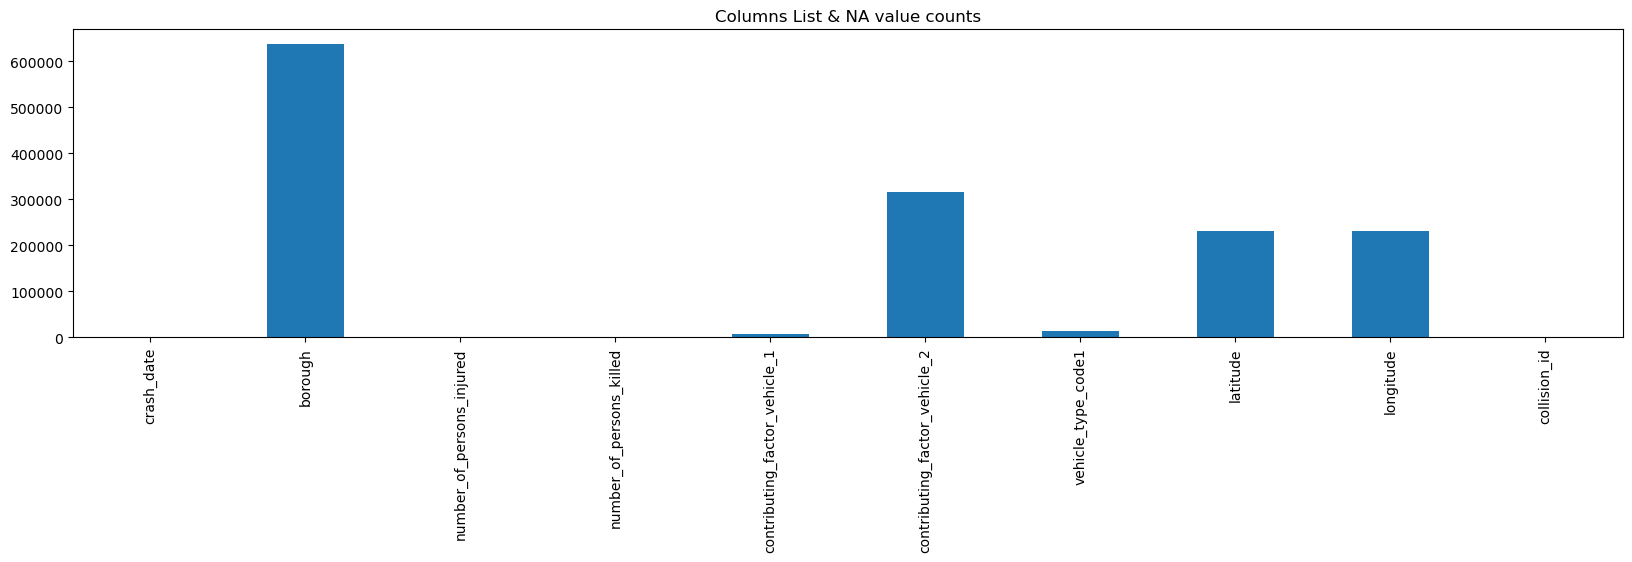

In [8]:
#checking the coulmns list wchich has Null values 
NA_col = selected_data.isnull().sum()
plt.figure(figsize=(20,4))
NA_col.plot(kind='bar')
plt.title('Columns List & NA value counts')
plt.show()

In [9]:
#Count of Null Values in te Each columns 
selected_data.isnull().sum() 

crash_date                            0
borough                          637302
number_of_persons_injured            18
number_of_persons_killed             31
contributing_factor_vehicle_1      6589
contributing_factor_vehicle_2    315054
vehicle_type_code1                13210
latitude                         231944
longitude                        231944
collision_id                          0
dtype: int64

In [10]:
#Descriptive Statistics of Seleceted data 
selected_data.describe().T

,count,unique,top,freq
crash_date,2048642,4180,2014-01-21T00:00:00.000,1161
borough,1411340,5,BROOKLYN,448312
number_of_persons_injured,2048624,31,0,1585578
number_of_persons_killed,2048611,7,0,2045703
contributing_factor_vehicle_1,2042053,61,Unspecified,700205
contributing_factor_vehicle_2,1733588,61,Unspecified,1459544
vehicle_type_code1,2035432,1591,Sedan,564355
latitude,1816698,174309,0.0000000,4310
longitude,1816698,132713,0.0000000,4310
collision_id,2048642,2048642,4455765,1


In [11]:
selected_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2048642 entries, 0 to 2048641
Data columns (total 10 columns):
 #   Column                         Dtype 
---  ------                         ----- 
 0   crash_date                     object
 1   borough                        object
 2   number_of_persons_injured      object
 3   number_of_persons_killed       object
 4   contributing_factor_vehicle_1  object
 5   contributing_factor_vehicle_2  object
 6   vehicle_type_code1             object
 7   latitude                       object
 8   longitude                      object
 9   collision_id                   object
dtypes: object(10)
memory usage: 156.3+ MB


### Data Cleanning

In [12]:
#Change the datatypes of the selecetd variables 

# Convert 'crash_date' and 'crash_time' to datetime
selected_data['crash_date'] = pd.to_datetime(selected_data['crash_date'])

# Convert 'number_of_persons_injured' to integer
selected_data['number_of_persons_injured'] = pd.to_numeric(selected_data['number_of_persons_injured'], errors='coerce')
selected_data['number_of_persons_injured'] = selected_data['number_of_persons_injured'].fillna(0).astype(int)

selected_data['number_of_persons_killed'] = pd.to_numeric(selected_data['number_of_persons_killed'], errors='coerce')
selected_data['number_of_persons_killed'] = selected_data['number_of_persons_killed'].fillna(0).astype(int)

# Handle categorical variables
selected_data['contributing_factor_vehicle_1'].fillna(selected_data['contributing_factor_vehicle_1'].mode()[0], inplace=True)
selected_data['contributing_factor_vehicle_2'].fillna(selected_data['contributing_factor_vehicle_2'].mode()[0], inplace=True)
selected_data['borough'].fillna(selected_data['borough'].mode()[0], inplace=True)
selected_data['vehicle_type_code1'].fillna(selected_data['vehicle_type_code1'].mode()[0], inplace=True)
    
    
# Convert 'latitude' and 'longitude' to numeric, handle errors by coercing to NaN
selected_data['latitude'] = pd.to_numeric(selected_data['latitude'], errors='coerce')
selected_data['longitude'] = pd.to_numeric(selected_data['longitude'], errors='coerce')

# Fill NaN values with 0 for now (you may choose a different strategy)
selected_data['latitude'].fillna(0, inplace=True)
selected_data['longitude'].fillna(0, inplace=True)

# Convert 'latitude' and 'longitude' , 'collision_id' to integers
selected_data['latitude'] = selected_data['latitude'].astype(int)
selected_data['longitude'] = selected_data['longitude'].astype(int)
selected_data['collision_id'] = selected_data['collision_id'].astype(int)

C:\Users\shyam\AppData\Local\Temp\ipykernel_29152\457502843.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['crash_date'] = pd.to_datetime(selected_data['crash_date'])
C:\Users\shyam\AppData\Local\Temp\ipykernel_29152\457502843.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['number_of_persons_injured'] = pd.to_numeric(selected_data['number_of_persons_injured'], errors='coerce')
C:\Users\shyam\AppData\Local\Temp\ipykernel_29152\457502843.py:8: SettingWithCopyWarning: 
A v

In [13]:
#Rechecking the data type of the selected data  
selected_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2048642 entries, 0 to 2048641
Data columns (total 10 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   crash_date                     datetime64[ns]
 1   borough                        object        
 2   number_of_persons_injured      int32         
 3   number_of_persons_killed       int32         
 4   contributing_factor_vehicle_1  object        
 5   contributing_factor_vehicle_2  object        
 6   vehicle_type_code1             object        
 7   latitude                       int32         
 8   longitude                      int32         
 9   collision_id                   int32         
dtypes: datetime64[ns](1), int32(5), object(4)
memory usage: 117.2+ MB


In [14]:
#checking the missing values of selected data after data cleanning 
selected_data.isnull().sum()


crash_date                       0
borough                          0
number_of_persons_injured        0
number_of_persons_killed         0
contributing_factor_vehicle_1    0
contributing_factor_vehicle_2    0
vehicle_type_code1               0
latitude                         0
longitude                        0
collision_id                     0
dtype: int64

In [15]:
#descriptive Statistics of the data 
selected_data.describe().T

,count,mean,std,min,25%,50%,75%,max
number_of_persons_injured,2048642.0,3.064845e-01,6.968985e-01,0.0,0.00,0.0,0.00,43.0
number_of_persons_killed,2048642.0,1.476588e-03,4.044120e-02,0.0,0.00,0.0,0.00,8.0
latitude,2048642.0,3.538711e+01,1.277642e+01,0.0,40.00,40.0,40.00,43.0
longitude,2048642.0,-6.468230e+01,2.337360e+01,-201.0,-73.00,-73.0,-73.00,0.0
collision_id,2048642.0,3.139530e+06,1.504593e+06,22.0,3148280.25,3660557.5,4172959.75,4686779.0


In [16]:
selected_data.head()

,crash_date,borough,number_of_persons_injured,number_of_persons_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code1,latitude,longitude,collision_id
0,2021-09-11,BROOKLYN,2,0,Aggressive Driving/Road Rage,Unspecified,Sedan,0,0,4455765
1,2022-03-26,BROOKLYN,1,0,Pavement Slippery,Unspecified,Sedan,0,0,4513547
2,2022-06-29,BROOKLYN,0,0,Following Too Closely,Unspecified,Sedan,0,0,4541903
3,2021-09-11,BROOKLYN,0,0,Unspecified,Unspecified,Sedan,40,-73,4456314
4,2021-12-14,BROOKLYN,0,0,Unspecified,Unspecified,Sedan,40,-73,4486609


### Data Visualization

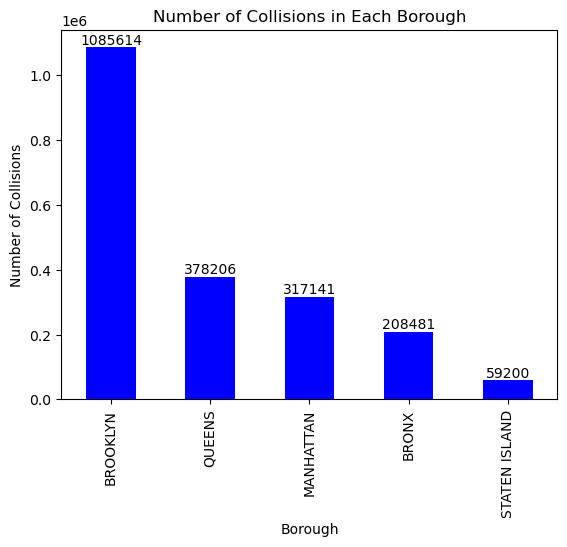

In [17]:
# Visual 1: Bar plot of the number of collisions in each borough with labels
ax = selected_data['borough'].value_counts().plot(kind='bar', color='blue')
plt.title('Number of Collisions in Each Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Collisions')

# Add labels on each bar
for i, count in enumerate(selected_data['borough'].value_counts()):
    plt.text(i, count + 50, str(count), ha='center', va='bottom')


plt.show()


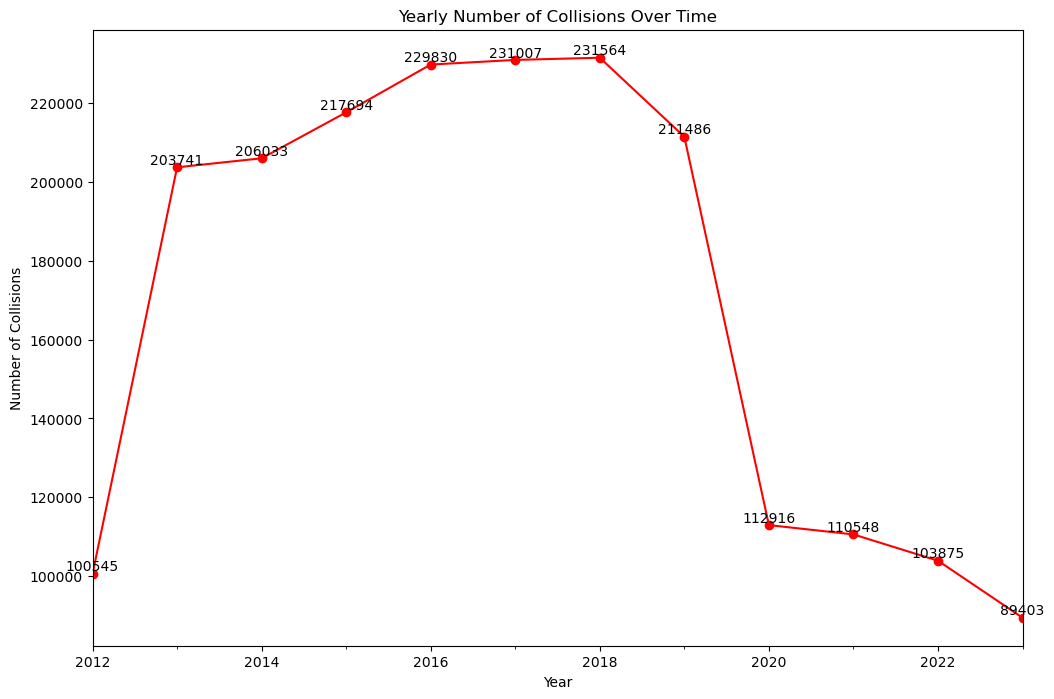

In [18]:
#Visual 2 : Number of collisions over time 

# Resample data on a yearly basis and plot with labels
yearly_collisions = selected_data.resample('Y', on='crash_date').size()
plt.figure(figsize=(12, 8))
yearly_collisions.plot(marker='o', linestyle='-', color='red')

# Add labels on each point
for date, count in yearly_collisions.items():
    plt.text(date, count, str(count), ha='center', va='bottom')

plt.title('Yearly Number of Collisions Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Collisions')
plt.show()


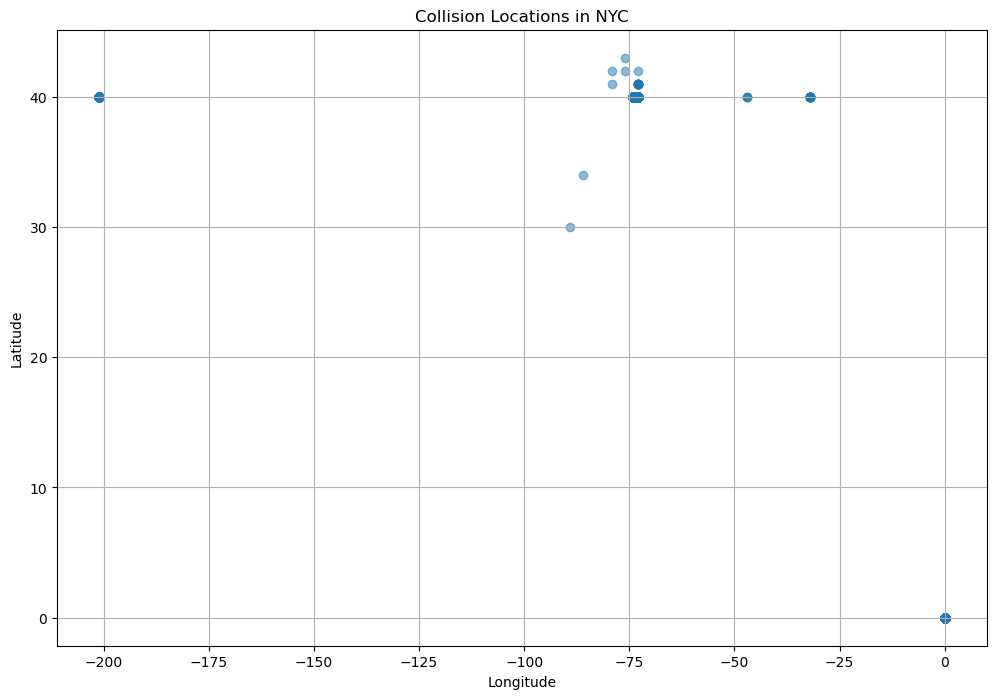

In [47]:
# Visual 3:  Create a scatter plot on the collision locations in NYC
%run finalproject_Group6.py
Collision_Locations_in_NYC(selected_data)


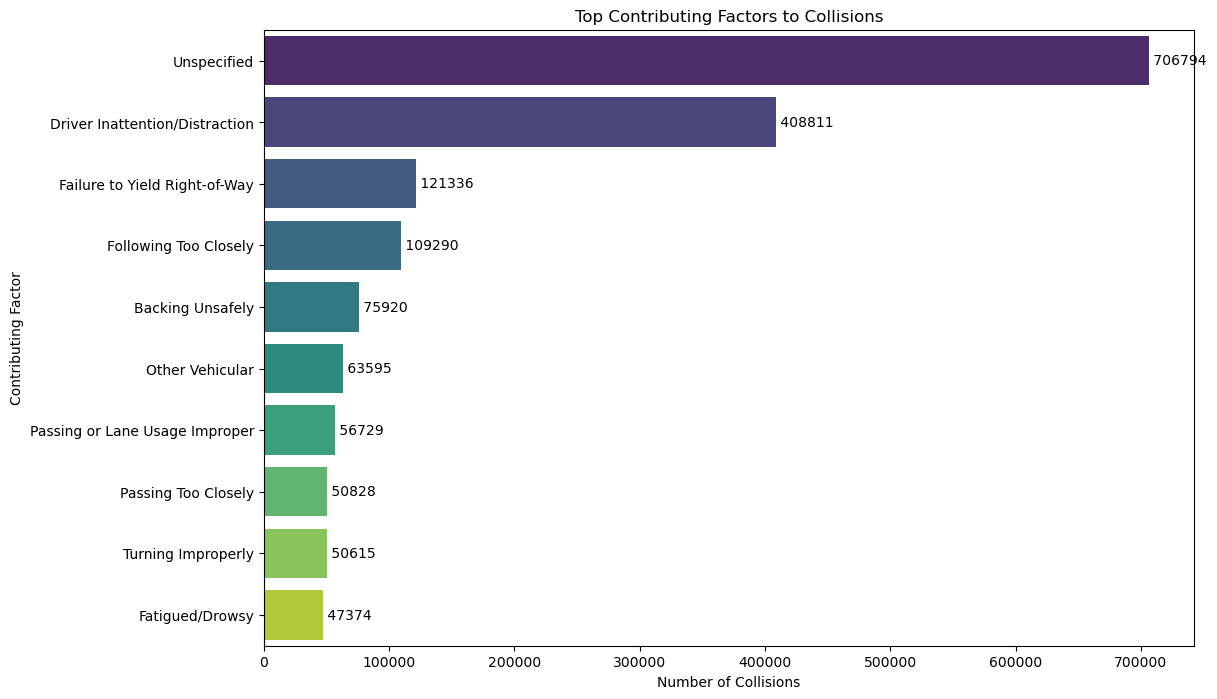

In [20]:
#Visual 4: Top Contributing Factors to collisions 
contributing_factors = selected_data['contributing_factor_vehicle_1'].value_counts().head(10)

plt.figure(figsize=(12, 8))
barplot = sns.barplot(x=contributing_factors.values, y=contributing_factors.index, palette='viridis')

# Add labels on each bar
for index, value in enumerate(contributing_factors.values):
    barplot.text(value, index, f' {value}', ha='left', va='center', fontsize=10)

plt.title('Top Contributing Factors to Collisions')
plt.xlabel('Number of Collisions')
plt.ylabel('Contributing Factor')
plt.show()


<Figure size 2000x2000 with 0 Axes>

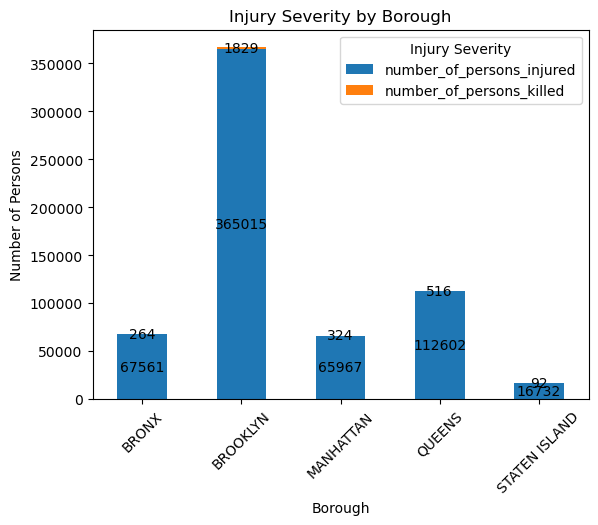

In [21]:
#Visual 5
plt.figure(figsize=(20, 20))

injury_severity = selected_data[['number_of_persons_injured', 'number_of_persons_killed', 'borough']]
injury_severity_by_borough = injury_severity.groupby('borough').sum()


barplot = injury_severity_by_borough.plot(kind='bar', stacked=True)

# Add labels on each bar
for bar in barplot.patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_y() + bar.get_height() / 2
    value = int(bar.get_height())
    barplot.text(x, y, f'{value}', ha='center', va='center', fontsize=10)
   

plt.title('Injury Severity by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Persons')
plt.xticks(rotation=45)
plt.legend(title='Injury Severity', bbox_to_anchor=(1, 1))
plt.show()



C:\Users\shyam\AppData\Local\Temp\ipykernel_29152\3906777437.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['crash_date'] = pd.to_datetime(selected_data['crash_date'])


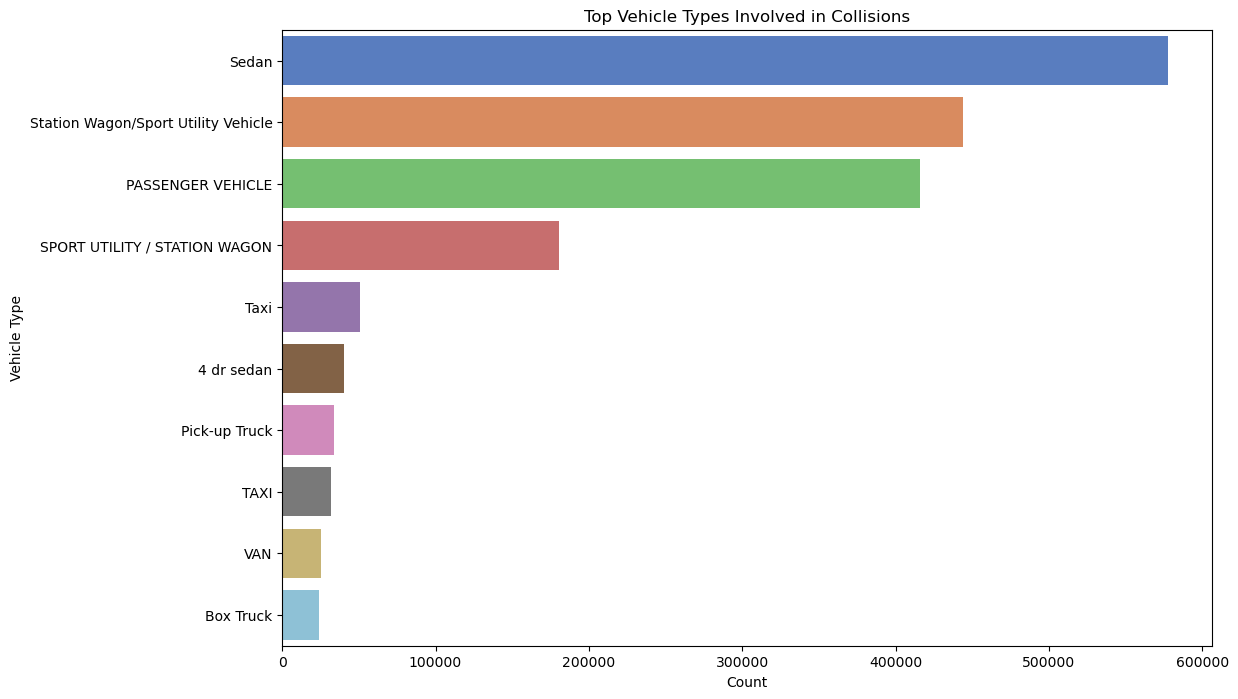

In [22]:
#Visual 6: Assuming your data is stored in a DataFrame called 'collision_data'
# If it's not already in datetime format, convert 'crash_date' to datetime
selected_data['crash_date'] = pd.to_datetime(selected_data['crash_date'])

# 4. Vehicle Types Involved in Collisions
plt.figure(figsize=(12, 8))
top_vehicle_types = selected_data['vehicle_type_code1'].value_counts().head(10)

# Use horizontal bar plot for better readability
sns.barplot(x=top_vehicle_types.values, y=top_vehicle_types.index, palette="muted", orient="h")
plt.title('Top Vehicle Types Involved in Collisions')
plt.xlabel('Count')
plt.ylabel('Vehicle Type')
plt.show()

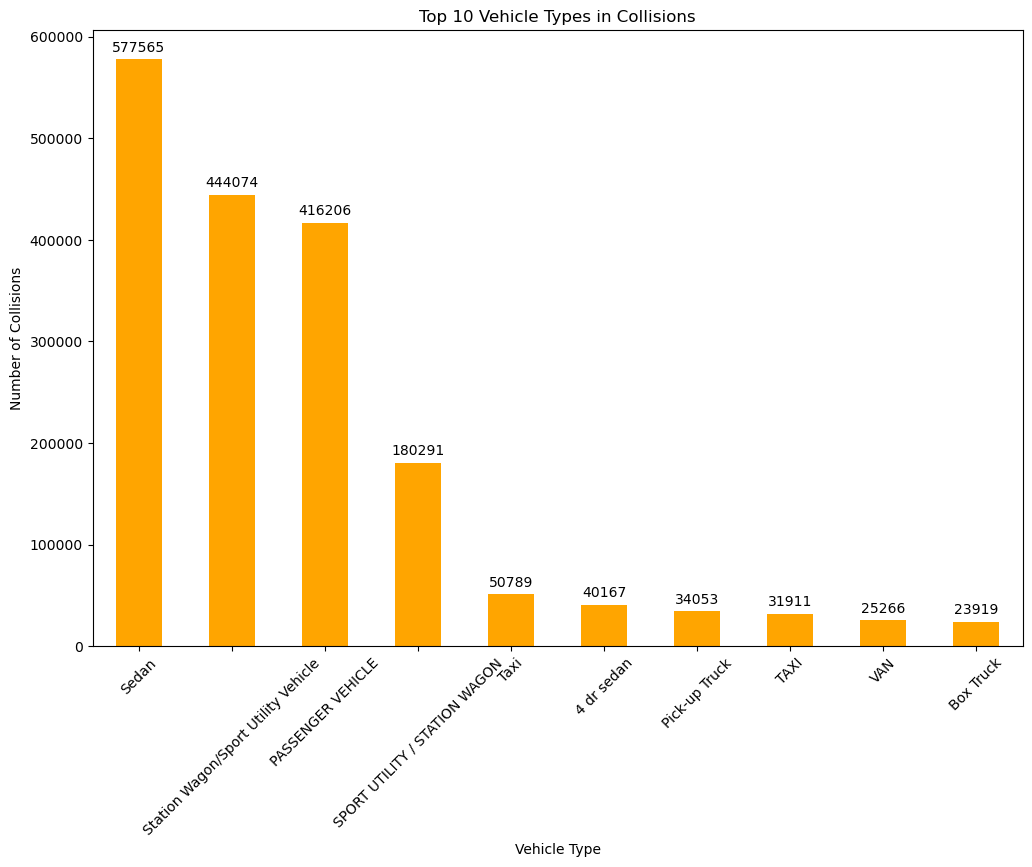

In [23]:
# Visual 7: Distribution of Collisions by Vehicle Type
plt.figure(figsize=(12, 8))
top_vehicle_types = selected_data['vehicle_type_code1'].value_counts().head(10)
top_vehicle_types.plot(kind='bar', color='orange')

plt.title('Top 10 Vehicle Types in Collisions')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Collisions')
plt.xticks(rotation=45)

# Adding labels on each bar
for i, count in enumerate(top_vehicle_types):
    plt.text(i, count + 5000, str(count), ha='center', va='bottom')

plt.show()





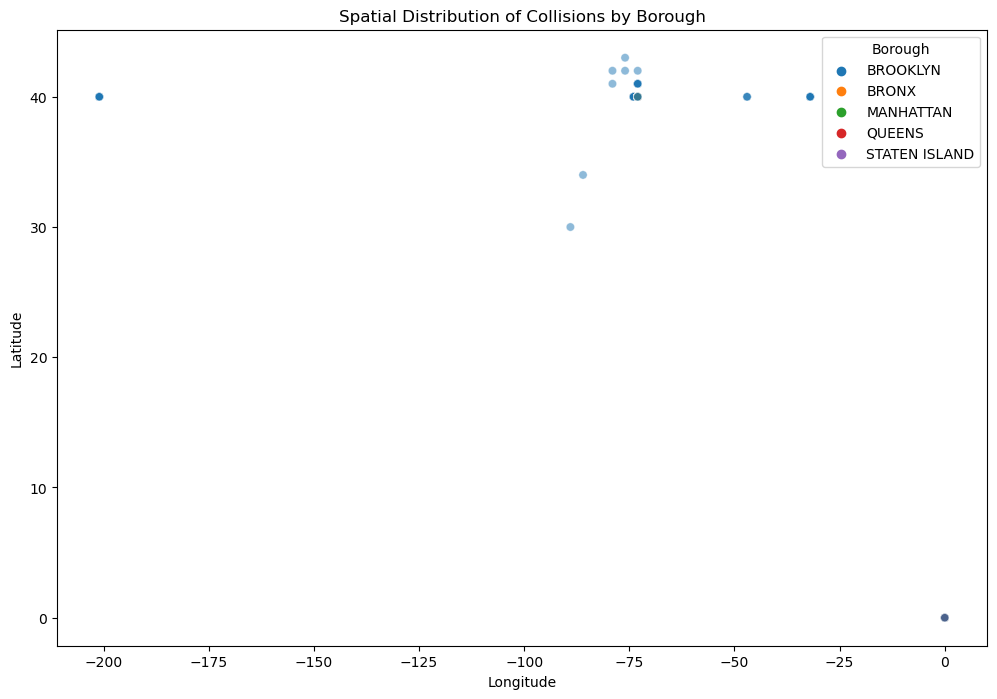

In [46]:
# visual 8: Spatial Distribution of Collisions
%run finalproject_Group6.py
Spatial_Distribution_of_Collisions_by_Borough(selected_data)

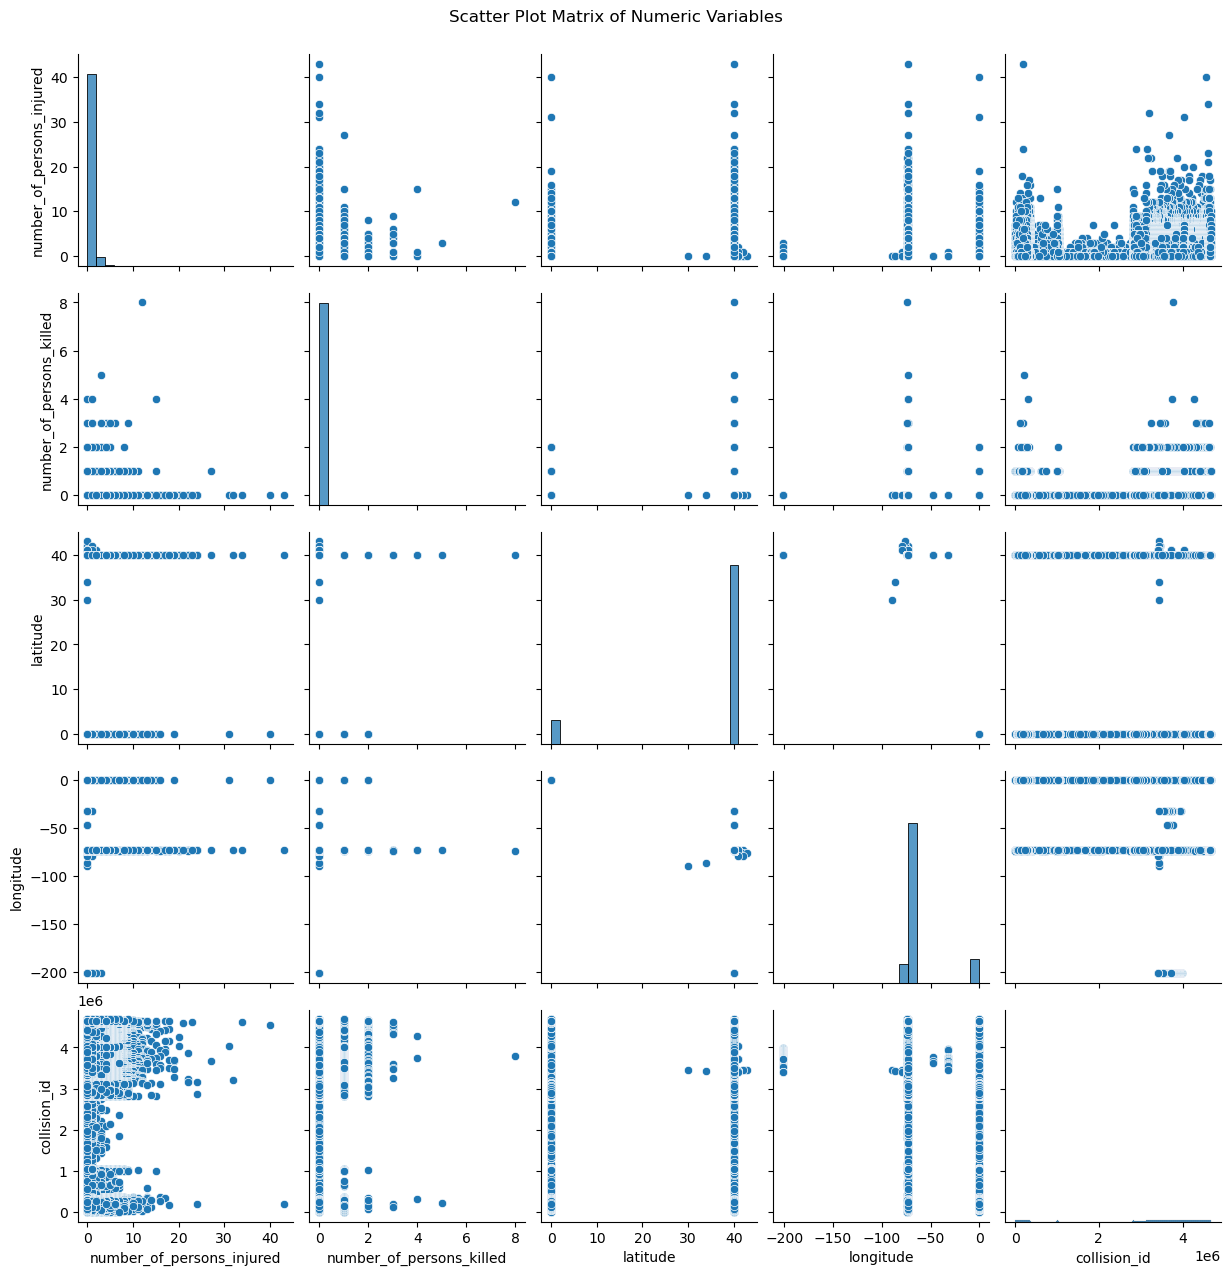

In [28]:
# visual 9: Correlation Heatmap
sns.pairplot(selected_data[['number_of_persons_injured', 'number_of_persons_killed', 'latitude', 'longitude', 'collision_id']])
plt.suptitle('Scatter Plot Matrix of Numeric Variables', y=1.02)
plt.show()



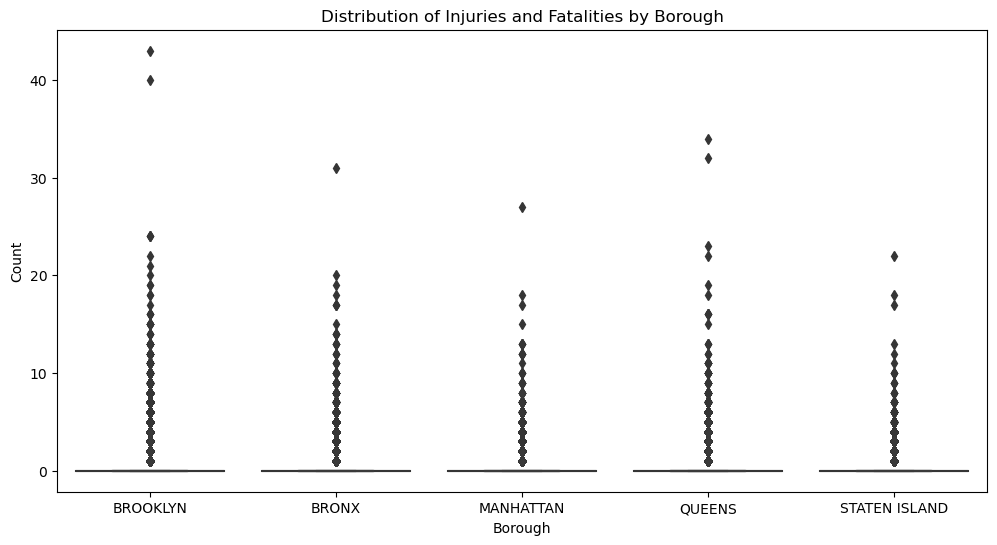

In [45]:
%run finalproject_Group6.py
distribution_of_injuries_and_fatalities(selected_data)

### Predictive Models

### Model 1: Random Forest Model 

In [28]:
# Encode categorical variables if needed
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in ['contributing_factor_vehicle_1', 'contributing_factor_vehicle_2', 'borough', 'vehicle_type_code1']:
    selected_data[col] = le.fit_transform(selected_data[col])

# Model 1: Random Forest Regressor
X = selected_data[[ 'number_of_persons_killed', 'borough', 'contributing_factor_vehicle_1']]
y = selected_data['number_of_persons_injured']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\shyam\AppData\Local\Temp\ipykernel_27784\879831230.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data[col] = le.fit_transform(selected_data[col])
C:\Users\shyam\AppData\Local\Temp\ipykernel_27784\879831230.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data[col] = le.fit_transform(selected_data[col])
C:\Users\shyam\AppData\Local\Temp\ipykernel_27784\879831230.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [29]:
# Model 
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)
y_pred_rf = rf_regressor.predict(X_test)

In [33]:
# Model Evaluation
print('Random Forest Regressor - Model Evaluation:')
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_rf))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_rf))
print('R2 Score:', r2_score(y_test, y_pred_rf))


Random Forest Regressor - Model Evaluation:
Mean Absolute Error: 0.45051523670758187
Mean Squared Error: 0.4652235025374705
R2 Score: 0.03443570557706643


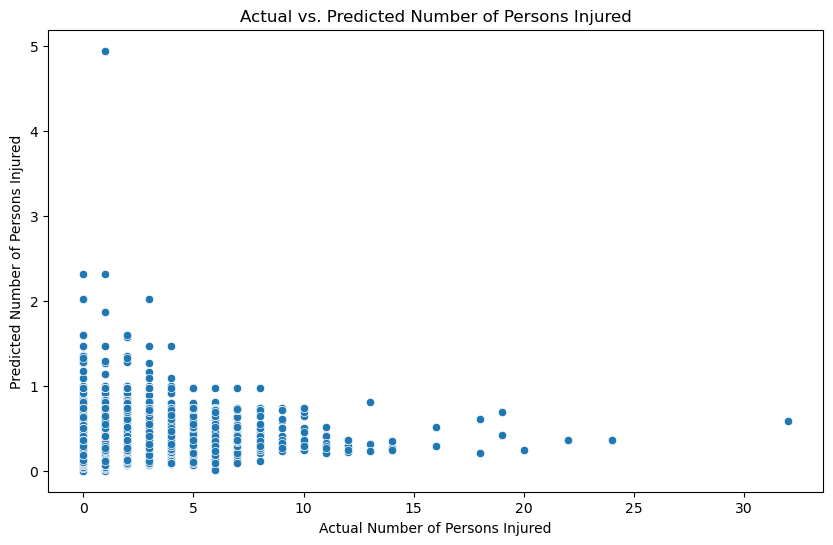

In [34]:
# Visualize predicted vs. actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.xlabel('Actual Number of Persons Injured')
plt.ylabel('Predicted Number of Persons Injured')
plt.title('Actual vs. Predicted Number of Persons Injured')
plt.show()

### Gradient Boosting Model 

In [35]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor()



In [36]:
# Train the model
gb_model.fit(X_train, y_train)




GradientBoostingRegressor()

In [37]:
# Make predictions on the test set
y_pred = gb_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Gradient Boosting Regressor - Model Evaluation:")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Gradient Boosting Regressor - Model Evaluation:
Mean Absolute Error: 0.45437730294354706
Mean Squared Error: 0.4661829408019807
R2 Score: 0.03244440607078336
